# Exploratory Data Analysis

## Importing and formatting the Data

In [17]:
# Importing the secessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the csv file into pandas dataframe
hours = 8760
df = pd.read_csv("./AQI_data.csv",nrows=hours)
df

,timestamp,PM10 ug/m3,PM2.5 ug/m3,PM 1 ug/m3,O3 ppb,CO ppm,NO ppb,NO2 ppb,NOx ppb,CO2 ppm
0,6/5/2019 1:00,44.35,29.95,14.73,NaN,NaN,NaN,NaN,NaN,NaN
1,6/5/2019 2:00,42.13,28.35,13.93,NaN,NaN,NaN,NaN,NaN,NaN
2,6/5/2019 3:00,47.98,32.55,15.93,NaN,NaN,NaN,NaN,NaN,NaN
3,6/5/2019 4:00,58.43,39.73,19.33,NaN,NaN,NaN,NaN,NaN,NaN
4,6/5/2019 5:00,49.70,33.58,16.40,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8755,6/3/2020 20:00,14.33,11.78,6.13,13.0,0.58,1.85,4.42,6.27,387.3
8756,6/3/2020 21:00,12.35,9.88,5.23,14.0,0.56,1.98,4.92,6.90,397.7
8757,6/3/2020 22:00,12.30,9.80,5.18,12.0,0.53,2.19,6.55,8.74,384.0
8758,6/3/2020 23:00,16.35,13.88,7.30,11.0,0.62,2.49,10.00,12.49,402.1


In [18]:
# Converting timestamp column to a datetime data type
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['timestamp']


0      2019-06-05 01:00:00
1      2019-06-05 02:00:00
2      2019-06-05 03:00:00
3      2019-06-05 04:00:00
4      2019-06-05 05:00:00
               ...        
8755   2020-06-03 20:00:00
8756   2020-06-03 21:00:00
8757   2020-06-03 22:00:00
8758   2020-06-03 23:00:00
8759   2020-06-04 00:00:00
Name: timestamp, Length: 8760, dtype: datetime64[ns]

In [19]:
# Setting the timestamp column as the index of the DataFrame
df.set_index('timestamp',inplace=True)
df

,PM10 ug/m3,PM2.5 ug/m3,PM 1 ug/m3,O3 ppb,CO ppm,NO ppb,NO2 ppb,NOx ppb,CO2 ppm
timestamp,,,,,,,,,
2019-06-05 01:00:00,44.35,29.95,14.73,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-05 02:00:00,42.13,28.35,13.93,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-05 03:00:00,47.98,32.55,15.93,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-05 04:00:00,58.43,39.73,19.33,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-05 05:00:00,49.70,33.58,16.40,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-06-03 20:00:00,14.33,11.78,6.13,13.0,0.58,1.85,4.42,6.27,387.3
2020-06-03 21:00:00,12.35,9.88,5.23,14.0,0.56,1.98,4.92,6.90,397.7
2020-06-03 22:00:00,12.30,9.80,5.18,12.0,0.53,2.19,6.55,8.74,384.0


## Handling Missing Values

In [20]:
# Interpolating the missing values (based on the value of the neighbors)
feature = 'PM2.5 ug/m3'
print(df[feature].isnull().sum())
df[feature] = df[feature].interpolate(method='time', axis=0)
print(df[feature].isnull().sum())

626
0


## Time Series Plot

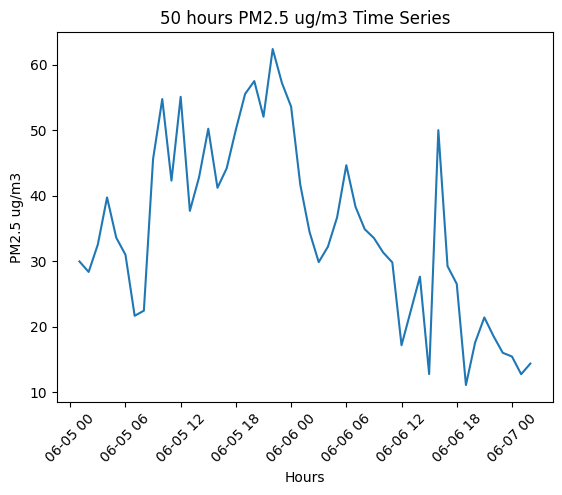

In [21]:
# Creating a time series plot using Matplotlib
hours = 50
plt.plot(df.index[0:hours], df[feature][0:hours])
plt.xlabel('Hours')
plt.ylabel(feature)
plt.title(str(hours) + ' hours '+ feature +' Time Series')
plt.xticks(rotation=45)
plt.show()

## Moving Average Plot

In [22]:
# Creating a rolling window of a specified size and 
# calculate the moving average of the feature values
hours = 300
window_size = 50  # set the window size to 30 hours
rolling_avg = df[feature][:hours].rolling(window = window_size,min_periods = 5).mean()
rolling_avg


timestamp
2019-06-05 01:00:00        NaN
2019-06-05 02:00:00        NaN
2019-06-05 03:00:00        NaN
2019-06-05 04:00:00        NaN
2019-06-05 05:00:00    32.8320
                        ...   
2019-06-17 08:00:00    34.9514
2019-06-17 09:00:00    34.9154
2019-06-17 10:00:00    35.0818
2019-06-17 11:00:00    35.2288
2019-06-17 12:00:00    35.4768
Name: PM2.5 ug/m3, Length: 300, dtype: float64

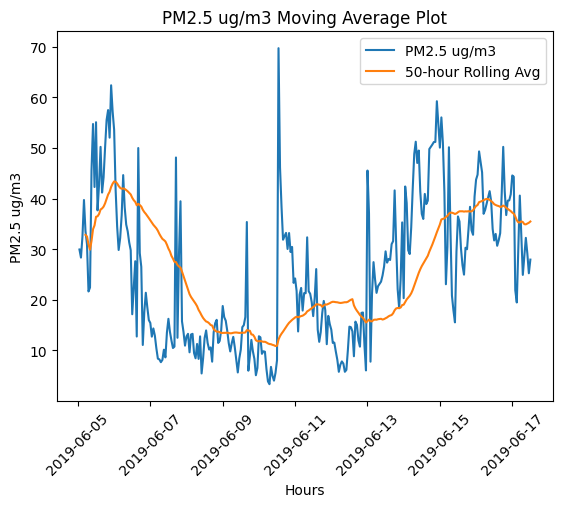

In [23]:
# Create a line plot of the original PM2.5 values and 
# the rolling average values
plt.plot(df.index[:hours], df[feature][:hours], label=feature)
plt.plot(rolling_avg.index, rolling_avg[:hours], label=f'{window_size}-hour Rolling Avg')
plt.xlabel('Hours')
plt.ylabel(feature)
plt.title(feature +' Moving Average Plot')
plt.xticks(rotation=45)
plt.legend()
plt.show()


## Handling the Outliers

No. of outliers detected = 95


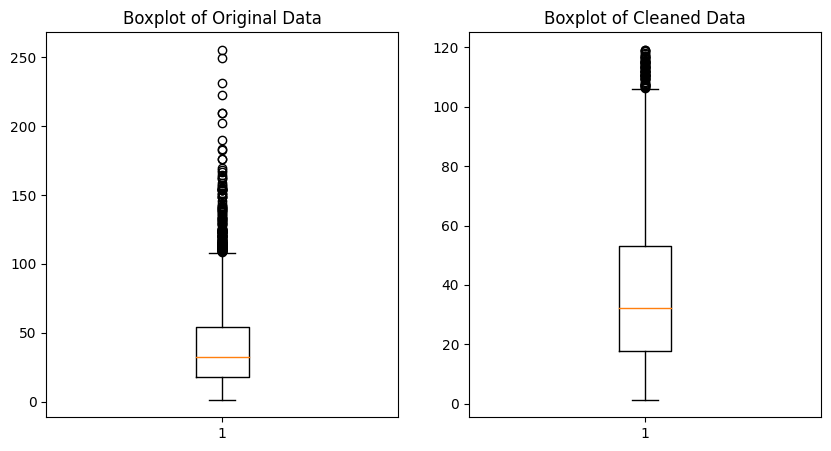

In [24]:
import numpy as np

# Boxplot of original data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].boxplot(df[feature])
axes[0].set_title('Boxplot of Original Data')

# Calculate z-scores for the PM2.5 values
z_scores = np.abs((df[feature] - df[feature].mean()) / df[feature].std())

# Define a threshold for outlier detection
z_threshold = 3

# Identify outliers
outliers = df[z_scores > z_threshold]
print("No. of outliers detected =",len(outliers))
# Remove outliers from the data
df = df[z_scores <= z_threshold]

# Boxplot of cleaned data
axes[1].boxplot(df[feature])
axes[1].set_title('Boxplot of Cleaned Data')

plt.show()

## Linear Regression Plot

300 300


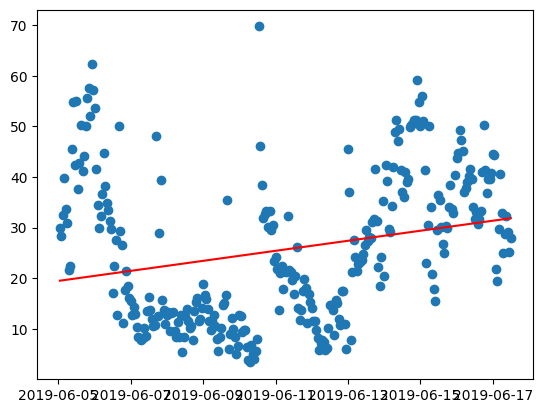

In [25]:
import numpy as np
# Plotting linear regression for Moving Average Values
hours = 300
plt.scatter(df.index[:hours],df[feature][:hours])
# Fit a straight line to the data using polyfit()
x = np.arange(hours)
y = df[feature][:hours]
print(len(x),len(y))
slope, intercept = np.polyfit(x, y, 1)

# Plot the linear regression line using plot()
plt.plot(df.index[:hours], slope*x + intercept, color='red')

plt.show()

## Seasonal Subseries Plot

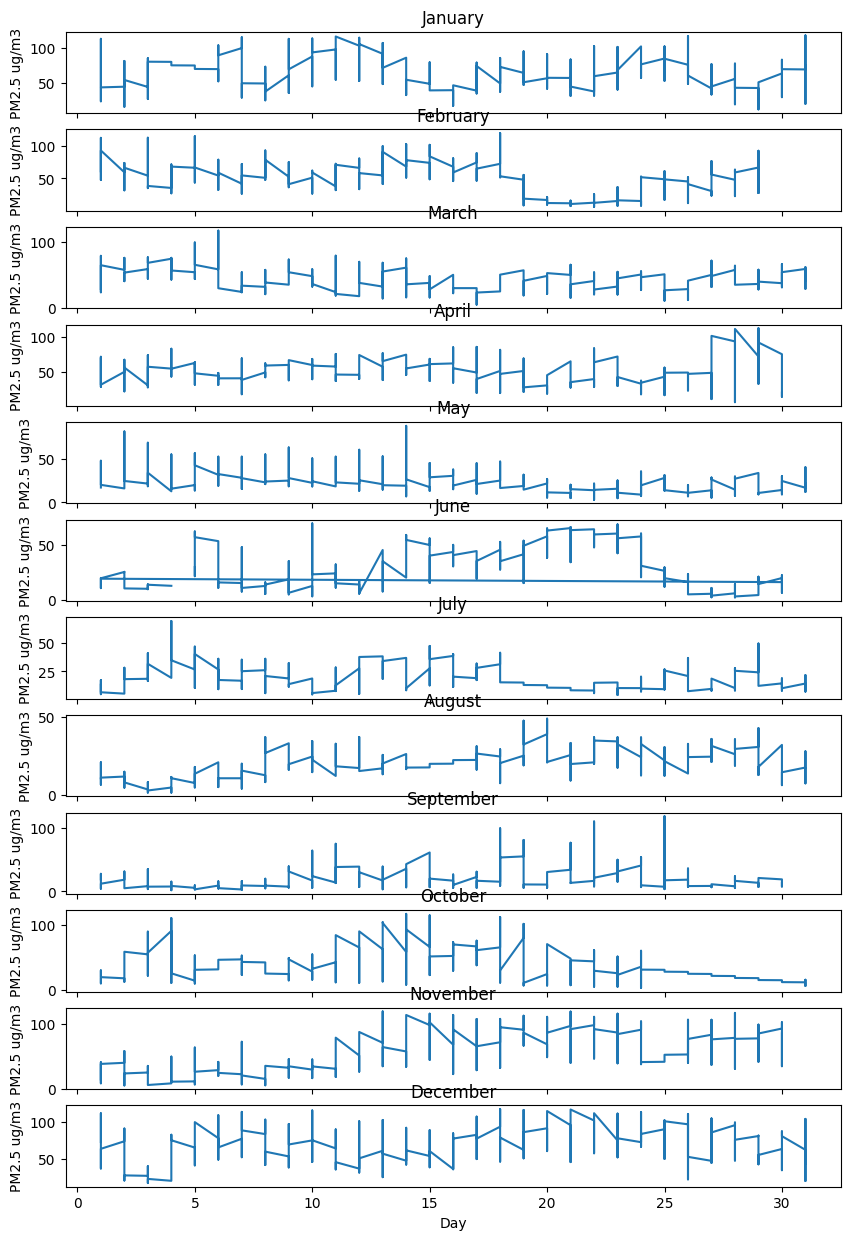

In [26]:
fig, axes = plt.subplots(nrows=12, figsize=(10, 15), sharex=True)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, month in enumerate(range(1,13)):
    df_month = df[df.index.month == month]
    axes[i].plot(df_month.index.day, df_month[feature])
    axes[i].set_title(f"{months[month-1]}")
    axes[i].set_ylabel(f"{feature}")
    
plt.xlabel('Day')
plt.show()

## Traning Testing Split
## Training Time Series Forecasting Models
### 1. ARIMA
### 2. SARIMA
### 3. Prophet